<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 190.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 194.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 169.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.9 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-19 12:52:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.4MB/s    in 2.4s    

2025-05-19 12:52:49 (64.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


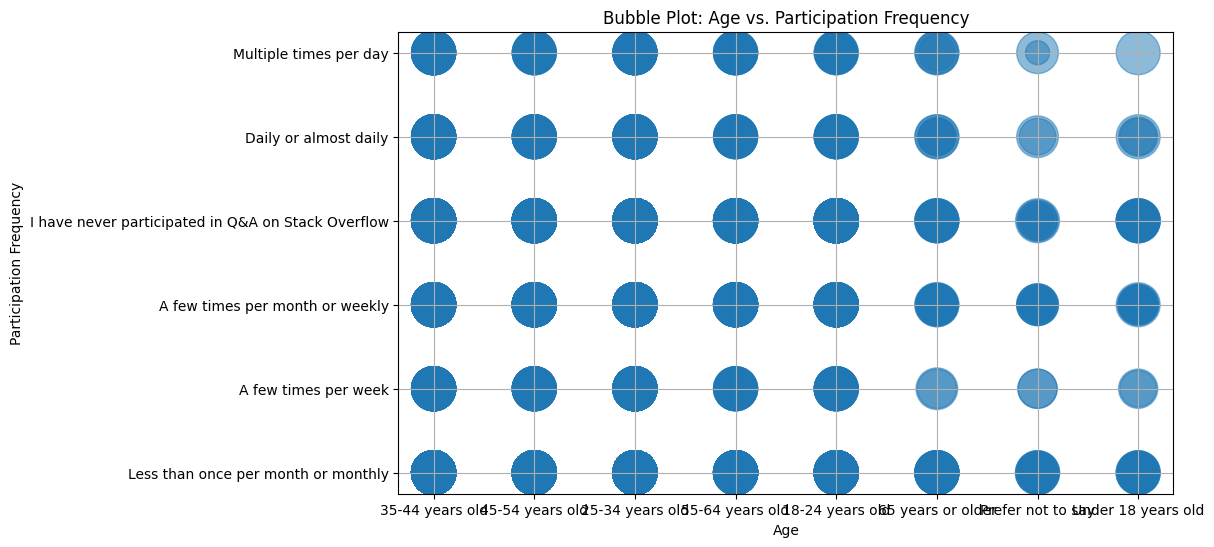

In [3]:
df = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

age = df['Age']
participation_freq = df['SOPartFreq']
job_satisfaction = df['JobSat']

plt.figure(figsize=(10, 6))
plt.scatter(age, participation_freq, s=[js * 100 for js in job_satisfaction], alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.title('Bubble Plot: Age vs. Participation Frequency')
plt.grid(True)

plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [4]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


ValueError: s must be a scalar, or float array-like with the same size as x and y

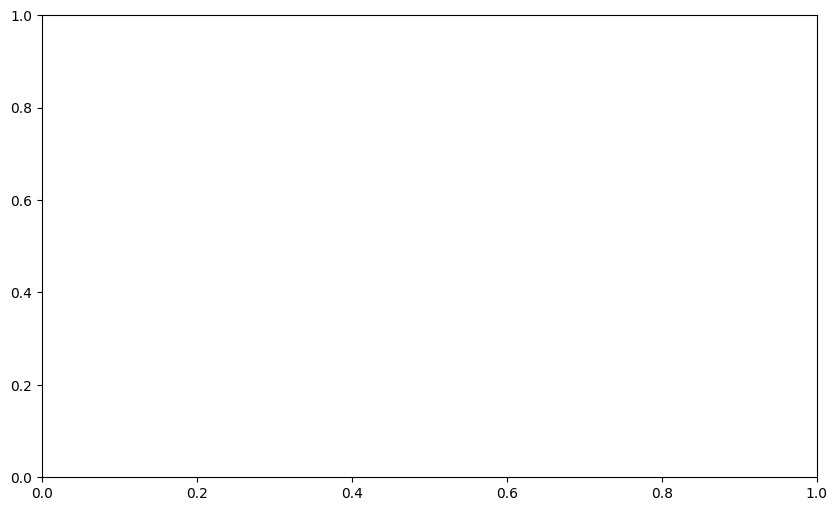

In [5]:
compensation = df['ConvertedCompYearly']
job_satisfaction = df['JobSat']
age = df['Age']


plt.figure(figsize=(10, 6))
plt.scatter(compensation, job_satisfaction, s=age.values, alpha=0.5)

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction')
plt.grid(True)

plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [6]:
age_language_pairs = []
for index, row in df.iterrows():
    age = row['Age']
    languages = row['LanguageHaveWorkedWith'].split(';')  # Assuming languages are separated by semicolons
    for language in languages:
        age_language_pairs.append((age, language.strip()))

language_counts = Counter(age_language_pairs)

ages = [pair[0] for pair in language_counts.keys()]
languages = [pair[1] for pair in language_counts.keys()]
frequencies = [count for count in language_counts.values()]

plt.figure(figsize=(14, 8))
plt.scatter(ages, languages, s=[f * 10 for f in frequencies], alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Programming Languages')
plt.title('Bubble Plot: Technology Preferences by Age')
plt.grid(True)

plt.show()

AttributeError: 'float' object has no attribute 'split'

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [7]:
job_db_pairs = []
for index, row in df.iterrows():
    job_satisfaction = row['JobSat']
    databases = row['DatabaseWantToWorkWith'].split(';')  # Assuming databases are separated by semicolons
    for database in databases:
        job_db_pairs.append((job_satisfaction, database.strip()))

db_counts = Counter(job_db_pairs)

job_sats = [pair[0] for pair in db_counts.keys()]
databases = [pair[1] for pair in db_counts.keys()]
frequencies = [count for count in db_counts.values()]

plt.figure(figsize=(14, 8))
plt.scatter(job_sats, databases, s=[f * 10 for f in frequencies], alpha=0.5)

plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Databases')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.grid(True)

plt.show()

AttributeError: 'float' object has no attribute 'split'

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


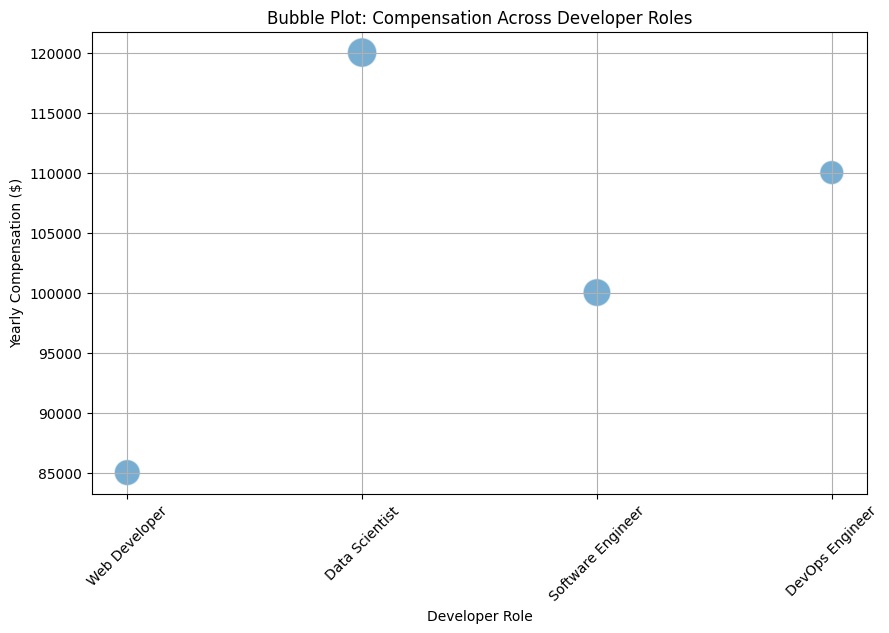

In [9]:
data = {
    "DevType": ["Web Developer", "Data Scientist", "Software Engineer", "DevOps Engineer"],
    "ConvertedCompYearly": [85000, 120000, 100000, 110000],
    "JobSat": [7, 9, 8, 6]  # Job satisfaction score, used for bubble size
}

df = pd.DataFrame(data)

# Normalize bubble sizes for better visualization
df["BubbleSize"] = df["JobSat"] * 50

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df["DevType"], df["ConvertedCompYearly"], s=df["BubbleSize"], alpha=0.6, edgecolors="w")

plt.xlabel("Developer Role")
plt.ylabel("Yearly Compensation ($)")
plt.title("Bubble Plot: Compensation Across Developer Roles")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [10]:
age_tool_pairs = []
for index, row in df.iterrows():
    age_group = row['Age']
    tools = row['NEWCollabToolsHaveWorkedWith'].split(';')  # Assuming tools are separated by semicolons
    for tool in tools:
        age_tool_pairs.append((age_group, tool.strip()))

# Count the frequency of each tool usage by age group
tool_counts = Counter(age_tool_pairs)

# Prepare data for plotting
age_groups = [pair[0] for pair in tool_counts.keys()]
tools = [pair[1] for pair in tool_counts.keys()]
frequencies = [count for count in tool_counts.values()]

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(age_groups, tools, s=[f * 10 for f in frequencies], alpha=0.5)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools by Age')
plt.grid(True)

# Show plot
plt.show()

KeyError: 'Age'

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
framework_satisfaction_pairs = []
for index, row in df.iterrows():
    job_satisfaction = row['JobSat']
    frameworks = row['WebframeWantToWorkWith'].split(';')  # Assuming frameworks are separated by semicolons
    for framework in frameworks:
        framework_satisfaction_pairs.append((framework.strip(), job_satisfaction))

# Count the number of respondents for each framework
framework_counts = Counter(framework_satisfaction_pairs)

# Prepare data for plotting
frameworks = [pair[0] for pair in framework_counts.keys()]
job_satisfactions = [pair[1] for pair in framework_counts.keys()]
respondent_counts = [count for count in framework_counts.values()]

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(frameworks, job_satisfactions, s=[count * 10 for count in respondent_counts], alpha=0.5)

# Add labels and title
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
# Split the admired technologies and create a list of tuples (country, technology)
country_tech_pairs = []
for index, row in df.iterrows():
    country = row['Country']
    technologies = row['LanguageAdmired'].split(';')  # Assuming technologies are separated by semicolons
    for tech in technologies:
        country_tech_pairs.append((country, tech.strip()))

# Count the frequency of admiration for each technology by country
tech_counts = Counter(country_tech_pairs)

# Prepare data for plotting
countries = [pair[0] for pair in tech_counts.keys()]
technologies = [pair[1] for pair in tech_counts.keys()]
admiration_frequencies = [count for count in tech_counts.values()]

# Create bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(countries, technologies, s=[freq * 10 for freq in admiration_frequencies], alpha=0.5)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.title('Bubble Plot of Admired Technologies Across Countries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
